In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats as sc

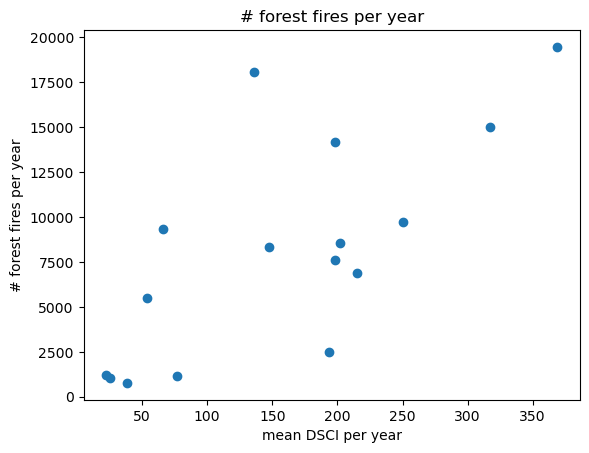

PearsonRResult(statistic=np.float64(0.7172461478712067), pvalue=np.float64(0.0017628885339218245))


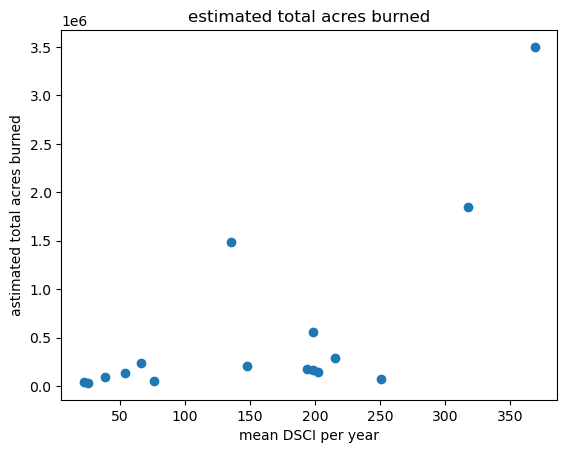

PearsonRResult(statistic=np.float64(0.6806421630302794), pvalue=np.float64(0.0037063596584299705))


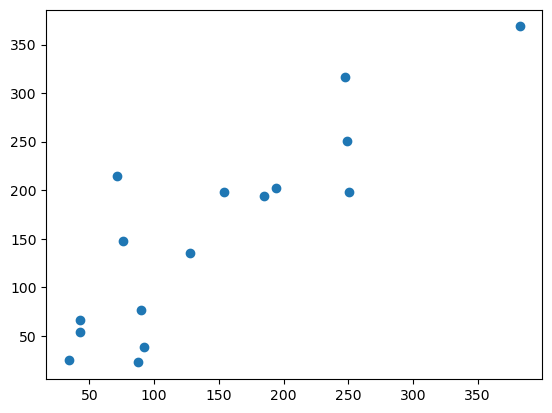

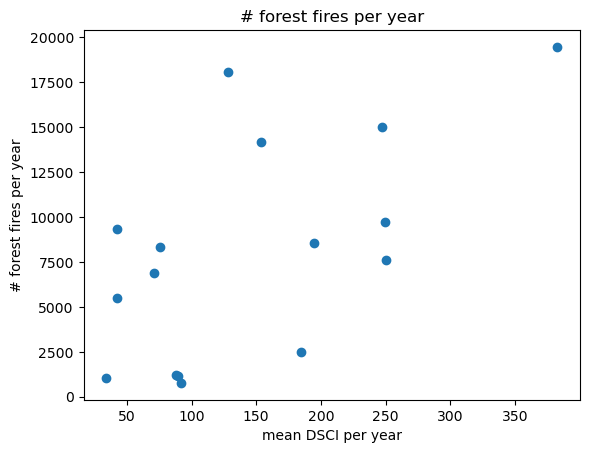

PearsonRResult(statistic=np.float64(0.5960486272279277), pvalue=np.float64(0.014821313697232386))


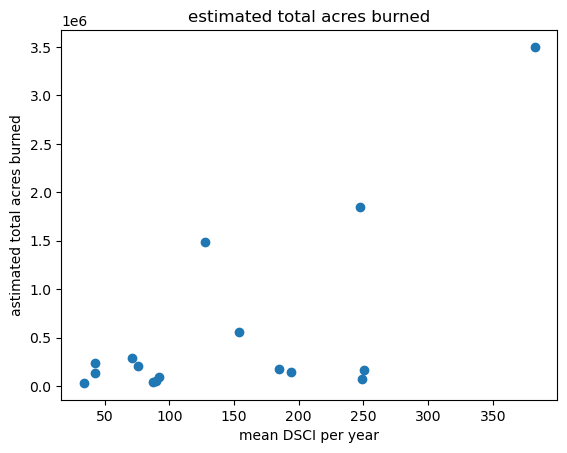

PearsonRResult(statistic=np.float64(0.6779452986415777), pvalue=np.float64(0.0038993525772586363))


In [81]:
#correlations of various factors
os.chdir("..")
os.chdir("dataset")

df_state = pd.read_csv("drought_state_tx.csv")
df_fires = pd.read_csv("texas_fires_drought.csv")

df_fires["year"] = df_fires["DISCOVERY_DATE_NEW"].astype(str).str.slice(0,4)
df1 = df_fires.groupby("year")["DSCI"].agg(["count", "mean"])

plt.scatter(df1["mean"], df1["count"])
plt.xlabel("mean DSCI per year")
plt.ylabel("# forest fires per year")
plt.title("# forest fires per year")
plt.show()
print(sc.pearsonr(df1["mean"], df1["count"]))

df2 = df_fires.groupby("year").agg({"DSCI" : ["count", "mean"], "FIRE_SIZE": "sum"})
plt.scatter(df2[("DSCI", "mean")], df2[("FIRE_SIZE", "sum")])

plt.xlabel("mean DSCI per year")
plt.ylabel("astimated total acres burned")
plt.title("estimated total acres burned")
plt.show()
print(sc.pearsonr(df2[("DSCI", "mean")], df2[("FIRE_SIZE", "sum")]))

df_state["year"]= df_state["MapDate"].astype(str).str.slice(0,4)
df_state = df_state.groupby("year")["DSCI"].mean()[:16]
plt.scatter(df_state, df2[("DSCI", "mean")])
plt.show()

plt.scatter(df_state, df1["count"])
plt.xlabel("mean DSCI per year")
plt.ylabel("# forest fires per year")
plt.title("# forest fires per year")
plt.show()
print(sc.pearsonr(df_state, df1["count"]))

df2 = df_fires.groupby("year").agg({"DSCI" : ["count", "mean"], "FIRE_SIZE": "sum"})
plt.scatter(df_state, df2[("FIRE_SIZE", "sum")])
plt.xlabel("mean DSCI per year")
plt.ylabel("astimated total acres burned")
plt.title("estimated total acres burned")
plt.show()
print(sc.pearsonr(df_state, df2[("FIRE_SIZE", "sum")]))
